In [104]:
!pip install --upgrade git+https://bitbucket.org/freemens/ion_sdk.git@master    
%env ALTERGO_FACTORY_API = https://staging.altergo.io/
%env ALTERGO_IOT_API = https://iot.staging.altergo.io/   

  Cloning https://bitbucket.org/freemens/ion_sdk.git (to revision master) to c:\users\gcoll\appdata\local\temp\pip-req-build-cpyobzgi
env: ALTERGO_FACTORY_API=https://staging.altergo.io/
env: ALTERGO_IOT_API=https://iot.staging.altergo.io/


  Running command git clone -q https://bitbucket.org/freemens/ion_sdk.git 'C:\Users\gcoll\AppData\Local\Temp\pip-req-build-cpyobzgi'


In [105]:
import pandas as pd
data = pd.read_csv('fullyearweather.csv')
import matplotlib.pyplot as plt
import ion_sdk.edison_api.edison_api as eapi
import datetime
from ion_sdk.edison_api.models.factoryModel import EdisonGenericComponent, Model,CurrentState

edApi=eapi.Client("f6ad4f7166814976b66b9cb346ebc5dd")


In [106]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data=data.set_index('timestamp')

In [107]:
print(data)

                     Direct radiation
timestamp                            
2020-01-01 00:00:00               0.0
2020-01-01 01:00:00               0.0
2020-01-01 02:00:00               0.0
2020-01-01 03:00:00               0.0
2020-01-01 04:00:00               0.0
...                               ...
2020-12-31 19:00:00               0.0
2020-12-31 20:00:00               0.0
2020-12-31 21:00:00               0.0
2020-12-31 22:00:00               0.0
2020-12-31 23:00:00               0.0

[8784 rows x 1 columns]


In [108]:
data.shape

(8784, 1)

In [109]:
data['Radiation rolling average'] = data['Direct radiation'].rolling(168,min_periods=168).mean()

In [100]:
data.quantile(.1)

Direct radiation              0.000000
Radiation rolling average    69.719845
Name: 0.1, dtype: float64

In [76]:
data.loc[data['Radiation rolling average'] < 69.719845]

,Direct radiation,Radiation rolling average
timestamp,,
2020-01-08 09:00:00,15.13,69.700773
2020-01-08 10:00:00,77.43,69.361726
2020-01-08 11:00:00,175.33,68.980297
2020-01-08 12:00:00,279.46,68.805476
2020-01-08 13:00:00,266.11,68.386964
...,...,...
2020-12-31 19:00:00,0.00,53.007976
2020-12-31 20:00:00,0.00,53.007976
2020-12-31 21:00:00,0.00,53.007976


In [101]:
quantile = data["Radiation rolling average"].quantile(.1)
result_index = data['Radiation rolling average'].sub(quantile).abs().idxmin()

In [102]:
print(result_index)

2020-01-07 23:00:00


In [103]:
print(data.loc[result_index])

Direct radiation              0.000000
Radiation rolling average    69.732559
Name: 2020-01-07 23:00:00, dtype: float64


In [110]:
serial = "BWEATHER-3"
asset=edApi.getAsset(serial)
print(asset)

EdisonComponent(id=348, serial_number='BWEATHER-3', iot_data=IotData(id=279, last_update=Datetime(date=datetime.datetime(2020, 12, 31, 23, 0), timezone_type=3, timezone='UTC'), shadow='{"totalCount":10446,"needRefresh":false,"refreshObj":[],"_id":"618a3ea7d2c432001c867b64","sensorStatistics":[{"_id":"618a3ea7d2c432001c867b65","componentId":348,"sensorId":15,"sensorCode":"uLT","sensorPosition":"0","lastUpdate":1609455600000,"lastValue":0,"firstUpdate":1577836800000,"firstValue":0,"count":5417,"createdAt":"2021-11-09T09:26:01.783Z","updatedAt":"2021-11-09T09:26:01.783Z"},{"_id":"618a3ea7d2c432001c867b67","componentId":348,"sensorId":28,"sensorCode":"OXq","sensorPosition":"0","lastUpdate":1609455600000,"lastValue":53.00797574999999,"firstUpdate":1578438000000,"firstValue":69.73255891666666,"count":5029,"createdAt":"2021-11-09T09:26:01.784Z","updatedAt":"2021-11-09T09:26:01.784Z"}],"componentId":348,"serialNumber":"BWEATHER-3","lastUpdate":1609455600000,"firstUpdate":1577836800000,"created

In [111]:

uploadSensorList=edApi.refactorDataframeToAsset(data,asset)
asset.df=data
edApi.updateSensorDataByFile(asset,uploadSensorList)


('Direct radiation', 100)
('Radiation rolling average', 100)

Preparing payload
Payload sent successfully! Checkout: https://staging.altergo.io/core/iot/connected_component/view/348/graph


In [112]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:xlabel='timestamp'>

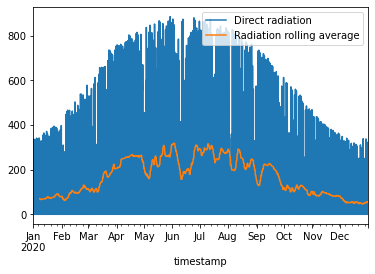

In [113]:
data.plot()

In [72]:
data['Radiation rolling average'].quantile(.1)

69.71984463095238